In [1]:
# Data Wrangling

# disable warnings
import warnings
warnings.filterwarnings('ignore')

# library import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# matplotlib jpn support
import japanize_matplotlib

# dataframe display function
from IPython.display import display

# diaply adjustment
# numpy float display adjustment
np.set_printoptions(suppress = True, precision = 4)

# pandas float display adjustment
pd.options.display.float_format = '{:.4f}'.format

# show all columns of dataframe
pd.set_option('display.max_columns', None)

# default font
plt.rcParams['font.size'] = 14

# set random number
random_seed = 123

resource URL   
https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset

#### Data column names Japanese

instant インデックス  
dteday 日付(yy-mm-dd)  
season 季節 (1: 冬 2: 春 3: 夏 4:秋)  
yr 年 (0: 2011, 1:2012)  
mnth 月  (1 - 12)  
hr 時間  (0 - 23)  
holiday 祝日  
weekday 曜日 (0 - 6)  
workingday  勤務日 (1: 勤務日 0: 休日)  
weathersit 天気 (1: 晴れから曇り 2: 霧 3: 小雨 4: 大雨)  
temp 気温 (正規化済み)  
atemp 体感気温 (正規化済み)  
hum 湿度 (正規化済み)  
windspeed 風速 (正規化済み)  
casual 臨時利用者数  
registered 登録利用者数  
cnt 全体利用者数  

# data import and verification

## data import

In [2]:
# dataset reosource URL
# url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip'

# download and unpack open dataset
# !wget $url -O Bike-Sharing-Dataset.zip | tail -n 1
# !unzip -o Bike-Sharing-Dataset.zip | tail -n 1

--2022-03-13 21:36:34--  https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 279992 (273K) [application/x-httpd-php]
Saving to: ‘Bike-Sharing-Dataset.zip’

Bike-Sharing-Datase 100%[===================>] 273.43K   507KB/s    in 0.5s    

2022-03-13 21:36:36 (507 KB/s) - ‘Bike-Sharing-Dataset.zip’ saved [279992/279992]

  inflating: hour.csv                


In [3]:
# data status
!head -5 day.csv

instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.2,0.212122,0.590435,0.160296,108,1454,1562


In [3]:
# import csv
# parse_dates = specify the column representing date
df = pd.read_csv('/Users/satoshiido/Documents/Coding_general/Business_AI/data/day.csv', parse_dates = [1])

# data attribute
print(df.dtypes)

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


In [4]:
# delete `instant` column
df = df.drop('instant', axis = 1)

# transalate columns in japanese
columns = [
    '日付',  '季節',  '年', '月', '祝日', '曜日', '勤務日', '天気', 
    '気温', '体感温度',  '湿度', '風速',
    '臨時ユーザー利用数', '登録ユーザー利用数', '全体ユーザー利用数'
]

df.columns = columns

## data verification

In [5]:
# first 5 rows
display(df.head())
# last 5 rows
display(df.tail())

,日付,季節,年,月,祝日,曜日,勤務日,天気,気温,体感温度,湿度,風速,臨時ユーザー利用数,登録ユーザー利用数,全体ユーザー利用数
0,2011-01-01,1,0,1,0,6,0,2,0.3442,0.3636,0.8058,0.1604,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.3635,0.3537,0.6961,0.2485,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.1964,0.1894,0.4373,0.2483,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.2000,0.2121,0.5904,0.1603,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.2270,0.2293,0.4370,0.1869,82,1518,1600


,日付,季節,年,月,祝日,曜日,勤務日,天気,気温,体感温度,湿度,風速,臨時ユーザー利用数,登録ユーザー利用数,全体ユーザー利用数
726,2012-12-27,1,1,12,0,4,1,2,0.2542,0.2266,0.6529,0.3501,247,1867,2114
727,2012-12-28,1,1,12,0,5,1,2,0.2533,0.2550,0.5900,0.1555,644,2451,3095
728,2012-12-29,1,1,12,0,6,0,2,0.2533,0.2424,0.7529,0.1244,159,1182,1341
729,2012-12-30,1,1,12,0,0,0,1,0.2558,0.2317,0.4833,0.3508,364,1432,1796
730,2012-12-31,1,1,12,0,1,1,2,0.2158,0.2235,0.5775,0.1548,439,2290,2729


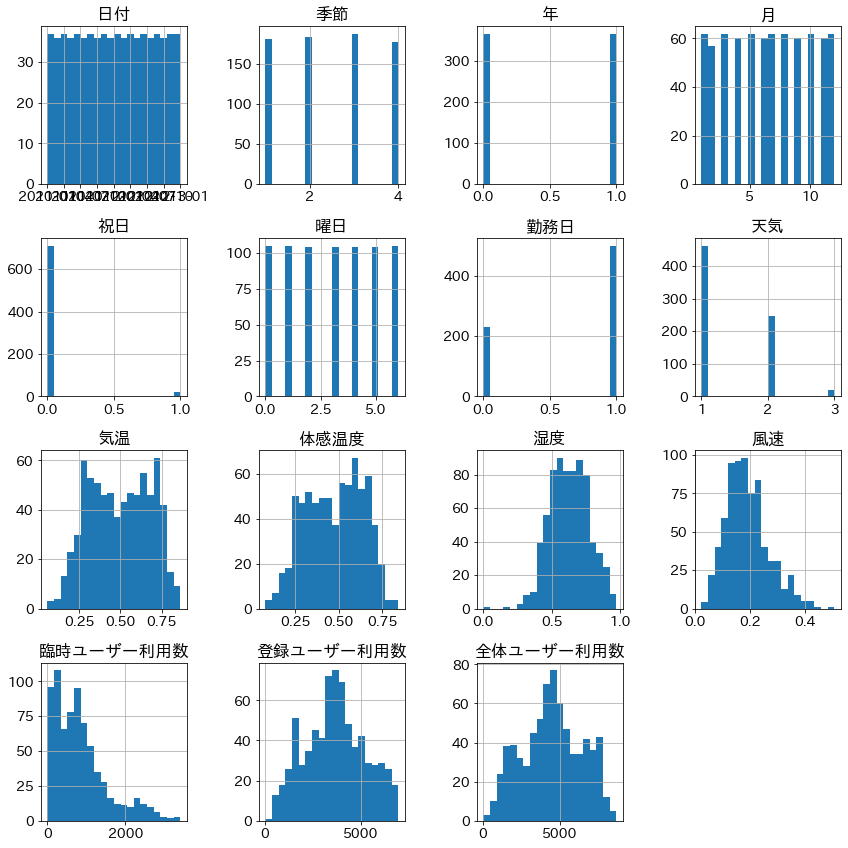

In [6]:
#　histogram

# graph adjustment
from pylab import rcParams
rcParams['figure.figsize'] = (12, 12)

# histgram with dataframe int columns
df.hist(bins = 20)
plt.tight_layout()
plt.show()

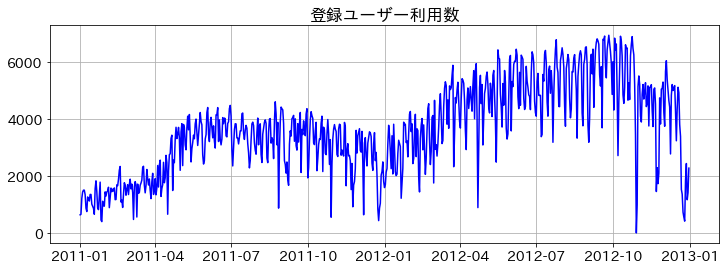

In [7]:
# graph of time series data

# show `登録ユーザー利用数`
plt.figure(figsize = (12, 4))

# plot
plt.plot(df['日付'], df['登録ユーザー利用数'], c = 'b')

# graph paper
plt.grid()
plt.title('登録ユーザー利用数')

plt.show()

In [9]:
# dependent variables -> `登録ユーザー利用数`, drop `全体ユーザー利用数`, `臨時ユーザー利用数`
# independent variables -> drop `日付` column
# split data -> use data from 2011-01-01 to 2012-10-30 as training set and 2012-11-01 to 2012-12-31 as validation set

In [19]:
# split data into x(=input data) and y(objective data)
x = df.drop(['日付', '臨時ユーザー利用数', '登録ユーザー利用数', '全体ユーザー利用数'], axis=1)
y = df['登録ユーザー利用数'].values

In [20]:
# set split-date
mday = pd.to_datetime('2012-11-1')

# set training set index and velidation set index
train_index = df['日付'] < mday
test_index = df['日付'] >= mday

# split input data
x_train = x[train_index] 
x_test = x[test_index]

# split objective data
y_train = y[train_index]
y_test = y[test_index]

# split datetime data for displaying a graph
dates_test = df['日付'][test_index]

In [21]:
# results of split(size)
# 670 rows
print(x_train.shape)
# 61 rows
print(x_test.shape)

# results of split(boundary value)
# 670 rows
display(x_train.tail())
# 61 rows
display(x_test.head())

(670, 11)
(61, 11)


,季節,年,月,祝日,曜日,勤務日,天気,気温,体感温度,湿度,風速
665,4,1,10,0,6,0,2,0.5300,0.5151,0.7200,0.2357
666,4,1,10,0,0,0,2,0.4775,0.4678,0.6946,0.3980
667,4,1,10,0,1,1,3,0.4400,0.4394,0.8800,0.3582
668,4,1,10,0,2,1,2,0.3182,0.3099,0.8255,0.2130
669,4,1,10,0,3,1,2,0.3575,0.3611,0.6667,0.1667


,季節,年,月,祝日,曜日,勤務日,天気,気温,体感温度,湿度,風速
670,4,1,11,0,4,1,2,0.3658,0.3699,0.5817,0.1573
671,4,1,11,0,5,1,1,0.3550,0.3560,0.5221,0.2662
672,4,1,11,0,6,0,2,0.3433,0.3238,0.4913,0.2705
673,4,1,11,0,0,0,1,0.3258,0.3295,0.5329,0.1791
674,4,1,11,0,1,1,1,0.3192,0.3081,0.4942,0.2363


# Algorithm selection

In [22]:
# XGBRegressor
from xgboost import XGBRegressor
algorithm = XGBRegressor(objective = 'reg:squarederror', random_state = random_seed)

# Learning and prediction

In [23]:
# learning
algorithm.fit(x_train, y_train)

# prediction
y_pred = algorithm.predict(x_test)

# prediction results
print(y_pred[:5])

[4927.806  4889.2686 3571.434  3637.8308 4719.999 ]


# Evaluation

In [24]:
# evaluation(`登録ユーザー利用数`)

# socre function
score = algorithm.score(x_test, y_test)

# R^2 score
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, y_pred)

# results
print(f'score: {score:.4f} r2_score: {r2_score:.4f}')

score: 0.4206 r2_score: 0.4206


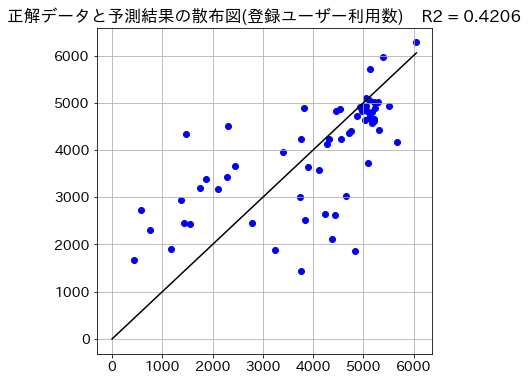

In [25]:
# scatter plot with test data and pred-data (登録ユーザー利用数)
plt.figure(figsize = (6, 6))
y_max = y_test.max()
plt.plot((0, y_max), (0, y_max), c = 'k')
plt.scatter(y_test, y_pred, c = 'b')
plt.title(f'正解データと予測結果の散布図(登録ユーザー利用数)\
    R2 = {score:.4f}')
plt.grid()
plt.show()

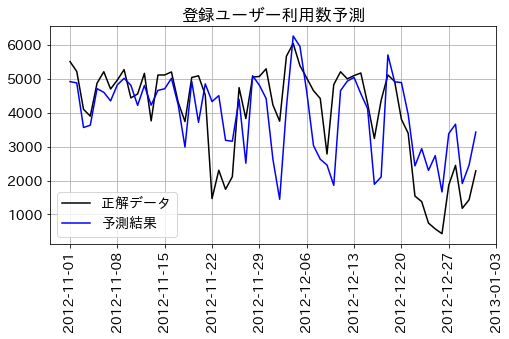

In [26]:
# time-series graph
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize = (8, 4))

# graph plot
ax.plot(dates_test, y_test, label = '正解データ', c = 'k')
ax.plot(dates_test, y_pred, label = '予測結果', c= 'b')

# scale intervals (every Thursday)
weeks = mdates.WeekdayLocator(byweekday = mdates.TH)
ax.xaxis.set_major_locator(weeks)

# rotation
ax.tick_params(axis = 'x', rotation = 90)

# grid, legend, title
ax.grid()
ax.legend()
ax.set_title('登録ユーザー利用数予測')

# plot
plt.show()

# Tuning

In [28]:
# One-hot encoding
def enc(df, column):
    df_dummy = pd.get_dummies(df[column], prefix = column)
    df = pd.concat([df.drop([column], axis = 1), df_dummy], axis = 1)
    return df

# one hot encoding 「月」「季節」columns
x2 = x.copy()
x2 = enc(x2, '月')
x2 = enc(x2, '季節')

#  results
display(x2.head())

,年,祝日,曜日,勤務日,天気,気温,体感温度,湿度,風速,月_1,月_2,月_3,月_4,月_5,月_6,月_7,月_8,月_9,月_10,月_11,月_12,季節_1,季節_2,季節_3,季節_4
0,0,0,6,0,2,0.3442,0.3636,0.8058,0.1604,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,2,0.3635,0.3537,0.6961,0.2485,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,1,1,1,0.1964,0.1894,0.4373,0.2483,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,2,1,1,0.2000,0.2121,0.5904,0.1603,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,3,1,1,0.2270,0.2293,0.4370,0.1869,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [29]:
# create the modified model

# split input data
x2_train = x2[train_index]
x2_test = x2[test_index]

# algorithm selection
algorithm2 = XGBRegressor(objective = 'reg:squarederror', random_state = random_seed)

# learning
algorithm2.fit(x2_train, y_train)

# prediction
y_pred2 = algorithm2.predict(x2_test)

# results
print(y_pred2[:5])

[4654.571  4324.7354 3174.4817 3028.7585 4276.959 ]


In [30]:
# evaluation

# score function
score2 = algorithm2.score(x2_test, y_test)

# results
print(f'score: {score2:.4f}')

score: 0.5099


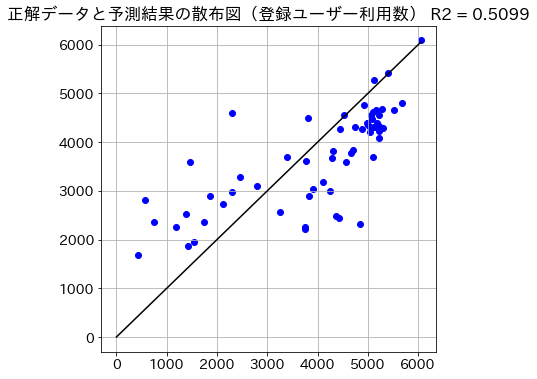

In [31]:
# scatter plot with correct data and prediction data
plt.figure(figsize = (6, 6))
y_max = y_test.max()
plt.plot((0, y_max), (0, y_max), c = 'k')
plt.scatter(y_test, y_pred2, c = 'b')
plt.title(f'正解データと予測結果の散布図（登録ユーザー利用数） R2 = {score2:.4f}')
plt.grid()
plt.show()

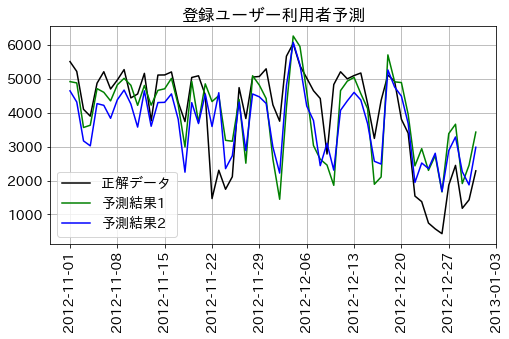

In [33]:
# time-seried-graph
fig, ax = plt.subplots(figsize = (8, 4))

# graph plot
ax.plot(dates_test, y_test, label = '正解データ', c = 'k')
ax.plot(dates_test, y_pred, label = '予測結果1', c = 'g')
ax.plot(dates_test, y_pred2, label = '予測結果2', c = 'b')

# scale intervals (every Thursday)
weeks = mdates.WeekdayLocator(byweekday = mdates.TH)
ax.xaxis.set_major_locator(weeks)

# rotation
ax.tick_params(axis = 'x', rotation = 90)

# grid, legend, title
ax.grid()
ax.legend()
ax.set_title('登録ユーザー利用者予測')

# 画面出力
plt.show()

# Feature importance analysis

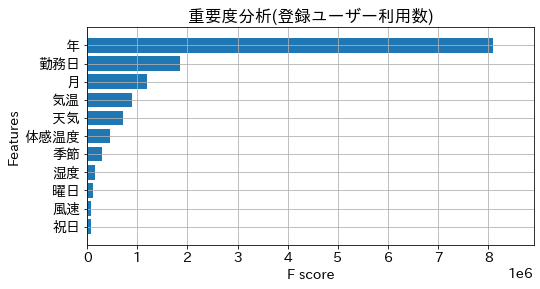

In [34]:
# feature importance for registered user usage
import xgboost as xgb
fig, ax = plt.subplots(figsize = (8, 4))
xgb.plot_importance(algorithm, ax = ax, height = 0.8,
    # `gain` is the average gain of splits which use the feature
    importance_type = 'gain', show_values = False,
    title = '重要度分析(登録ユーザー利用数)')
plt.show()